In [30]:
%load_ext autoreload
%autoreload 2
from common import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
RESULT_JSON = "/Users/law/repos/viper/results/reclaim/reclaim_revision.json"

### Rename all PmemHybrid to A_PmemHybrid (capital A) to fix the sorting

In [4]:
FIXTURES = [VIPER, DRAM_MAP, HYBRID_FASTER, NVM_FASTER, PMEMKV]
BM_TYPES = ['WRITE', 'READ']

BMS = get_all_runs(RESULT_JSON)
# pprint(BMS) 

BM_TYPE_RE = re.compile(r'.*reclaim_fixed_(.+?)/.*/threads:(\d+)')

def get_reclaim_bm_type(bm_name):
    match = BM_TYPE_RE.match(bm_name)
    if match is None:
        raise RuntimeError(f"unknown bm type: {bm_name}")
    return (match.group(1), int(match.group(2)) == 33)

RUNS = {}

for bm in BMS:
    reclaim_bm = get_reclaim_bm_type(bm['name'])
    RUNS[reclaim_bm] = bm
        
# pprint(RUNS)

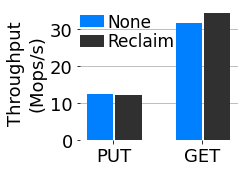

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))

# Set position of bar on X axis
bar_width = 0.30
bar_diff = 0.02
r1 = np.arange(2)
r2 = [x + bar_width + bar_diff for x in r1]

HATCHES = ['//', '', '\\\\', 'x']


write_none = RUNS[('WRITE', False)]['items_per_second'] / MILLION
write_recl = RUNS[('WRITE',  True)]['items_per_second'] / MILLION
read_none =  RUNS[('READ',  False)]['items_per_second'] / MILLION
read_recl =  RUNS[('READ',   True)]['items_per_second'] / MILLION

#ax.bar(r1[0], write_none, bar_width, label="None", edgecolor=COLORS[0], lw=2, hatch='//', color='white')
#ax.bar(r2[0], write_recl, bar_width, label='Reclaim', color=COLORS[3], lw=2, edgecolor=COLORS[3])
#ax.bar(r1[1], read_none, bar_width, edgecolor=COLORS[0], lw=2, hatch='//', color='white')
#ax.bar(r2[1], read_recl, bar_width, color=COLORS[3], lw=2, edgecolor=COLORS[3])
ax.bar(r1[0], write_none, bar_width, label="None", color=DRAM_COLOR)
ax.bar(r2[0], write_recl, bar_width, label='Reclaim', color=PMEM_COLOR)
ax.bar(r1[1], read_none, bar_width, color=DRAM_COLOR)
ax.bar(r2[1], read_recl, bar_width, color=PMEM_COLOR)


ax.set_xticks([r + (0.5 * bar_width) for r in range(2)])
ax.set_axisbelow(True)
ax.grid(axis='y', which='major')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)


ax.set_ylabel("Throughput\n(Mops/s)", fontsize=18)
ax.set_xticklabels(['PUT', 'GET'], fontsize=18)

# fig.legend(loc='upper center', bbox_to_anchor=(0.48, 1.15), 
#            ncol=2, frameon=False, fontsize=18, columnspacing=0.6, handletextpad=0.3)
fig.legend(loc='upper center', bbox_to_anchor=(0.52, 0.96), 
           ncol=1, frameon=False, fontsize=17, columnspacing=0.4, handletextpad=0.2, 
           borderpad=0.1, labelspacing=0.1, handlelength=1.4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
fig.savefig('charts/reclaim.pdf', bbox_inches='tight')
fig.savefig('charts/reclaim.svg', bbox_inches='tight')